,name,estimate,std,low_95,high_95,guess,fixed,lower_bound,upper_bound,prior_mean,prior_std
name,,,,,,,,,,,
a,a,12.889804,0.353454,12.140514,13.639093,1.0,False,-inf,inf,NaN,NaN
b,b,-1.830792,0.355372,-2.584146,-1.077437,1.0,False,-inf,inf,NaN,NaN
k,k,0.503583,0.031793,0.436185,0.570980,1.0,False,1.000000e-12,2.0,NaN,NaN


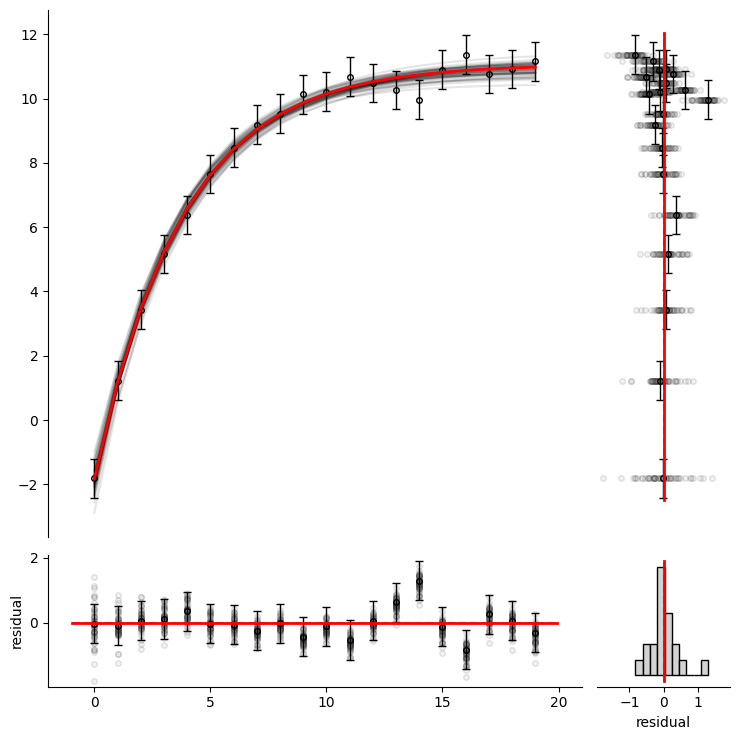

In [53]:
%matplotlib inline
import dataprob
import numpy as np

# ------------------------------------------------------------------------
# Define model and generate data

def exponential_saturation(a,b,k,x): 
    
    return a*(1 - np.exp(-k*(x))) + b

gen_params = {"a":13,
              "b":-2,
              "k":0.5}

err = 0.3
num_points = 20

x = np.linspace(0,10,num_points)
y_obs = exponential_saturation(x=x,**gen_params) + np.random.normal(0,err,num_points)
y_std = 2*err

test_fcn = exponential_saturation
non_fit_kwargs = {"x":x}

# ------------------------------------------------------------------------
# Run analysis

f = dataprob.setup(some_function=test_fcn,
                   method="ml",
                   non_fit_kwargs=non_fit_kwargs)

f.param_df.loc[["a","b","k"],"guess"] = [1,1,1]

f.param_df.loc["k","lower_bound"] = 1e-12
f.param_df.loc["k","upper_bound"] = 2

f.fit(y_obs=y_obs,
      y_std=y_std)


fig = dataprob.plot_summary(f)
f.fit_df

